In [1]:
import sys
sys.path.insert(0, '../')

In [2]:
import os

from voc12 import dataloader
from voc12.dataloader import TorchvisionNormalize
import torch
from voc12 import dataloader_2
from functools import partial
from voc12 import custom_transforms
from torchvision import transforms

In [3]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import torchvision.transforms.functional as F
import numpy as np
plt.rcParams["savefig.bbox"] = 'tight'
plt.rcParams["figure.figsize"] = (50,5)

In [4]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach().type(torch.uint8)
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [5]:
temp_dir = '../temp/notebook'
voc12_root = '../../vision/data/raw/VOCdevkit/VOC2012'
label_dir = '../../vision/data/raw/VOCdevkit/VOC2012/SegmentationClass'
train_list = '../voc12/dev.txt'
val_list = '../voc12/dev.txt'
cls_label_path = '../voc12/cls_labels.npy'
crop_size =  512

In [6]:
os.makedirs(temp_dir, exist_ok=True)

In [7]:
ds1 = dataloader.VOC12ClassificationDatasetMSF(
        train_list, voc12_root=voc12_root, scales=[1.0, 0.5, 1.5, 2.0]
    )

In [8]:
def tmp_func(x, crop_size):
    return custom_transforms.random_resize_long_tuple(x, crop_size, crop_size * 2)

In [45]:
tr_transform = transforms.Compose(
    [
        custom_transforms.CustomPILToTensor(),
        custom_transforms.CustomRandomAdjustSharpness(sharpness_factor=2, p=0.1),
        custom_transforms.CustomRandomAutocontrast(p=0.1),
        custom_transforms.CustomRandomEqualize(p=0.1),
        custom_transforms.CustomRandomRotation(degrees=(0, 10)),
        custom_transforms.CustomRandomHorizontalFlip(0.5),
        transforms.Lambda(partial(tmp_func, crop_size=crop_size)),
        custom_transforms.CustomRandomCrop(size=(crop_size, crop_size), pad_if_needed=True),
        #custom_transforms.CustomConvertImageDtype(torch.float),
        custom_transforms.CustomRandomErasing(p=0.1),
        #custom_transforms.CustomNormalize(
        #    mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)
        #),
    ]
)
tr_ds = dataloader_2.VOC12PseudoSegmentationDataset(
    train_list,
    voc12_root=voc12_root,
    transform=tr_transform,
    temp_dir=temp_dir,
)

torch.Size([3, 512, 512])


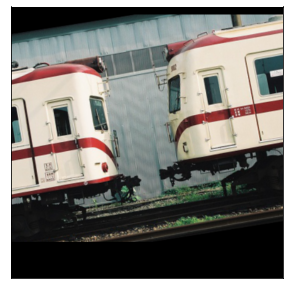

In [46]:
img = tr_ds[0]['img']
print(img.shape)
show(img)

In [11]:
val_transform = transforms.Compose(
    [
        custom_transforms.CustomPILToTensor(),
        custom_transforms.CustomCenterCrop(size=crop_size),
        #custom_transforms.CustomConvertImageDtype(torch.float),
        #custom_transforms.CustomNormalize(
        #    mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)
        #),
    ]
)
val_ds = dataloader_2.VOC12PseudoSegmentationDataset(
    val_list,
    transform=val_transform,
    voc12_root=voc12_root,
    temp_dir=temp_dir,
)

torch.Size([3, 512, 512])


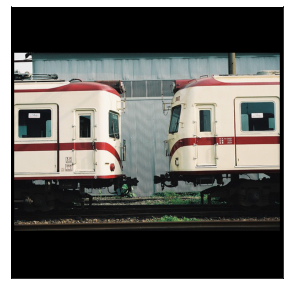

In [12]:
img = val_ds[0]['img']
print(img.shape)
show(img)

In [13]:
transform = transforms.Compose(
    [
        custom_transforms.CustomPILToTensor(),
        #custom_transforms.CustomConvertImageDtype(torch.float),
        #custom_transforms.CustomNormalize(
        #    mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)
        #),
    ]
)
ds = dataloader_2.VOC12ClassificationDatasetMSF(
    train_list, voc12_root=voc12_root, scales=[1.0, 0.5], transform=transform
)

torch.Size([3, 335, 500])


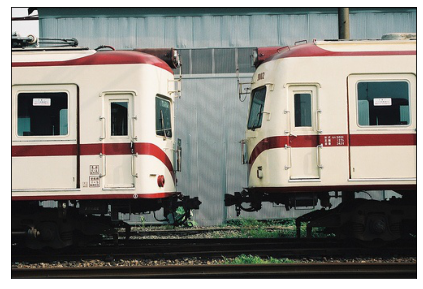

In [14]:
img = ds[0]['img'][0][0]
print(img.shape)
show(img)

## Old one

In [15]:
dataset_train = dataloader.VOC12PseudoSegmentationDataset(
    train_list,
    crop_size=crop_size,
    voc12_root=voc12_root,
    rescale=None,
    hor_flip=True,
    img_normal=None,
    crop_method="random",
    resize_long=(crop_size, crop_size * 2),
    temp_dir=temp_dir,
)

dataset_valid = dataloader.VOC12PseudoSegmentationDataset(
    val_list,
    crop_size=crop_size,
    img_normal=None,
    voc12_root=voc12_root,
    temp_dir=temp_dir,
)
train_dataset = dataloader.VOC12ClassificationDatasetMSF(
    train_list, voc12_root=voc12_root, scales=[1.0, 0.5], img_normal=None,
)

(3, 512, 512)


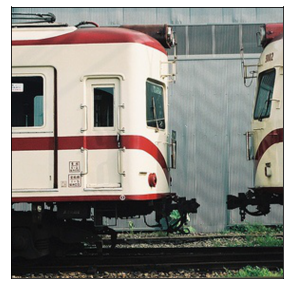

In [16]:
img = dataset_train[0]['img']
print(img.shape)
show(torch.from_numpy(img))

(3, 512, 512)


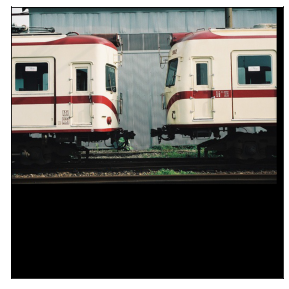

In [17]:
img = dataset_valid[0]['img']
print(img.shape)
show(torch.from_numpy(img))

(3, 335, 500)


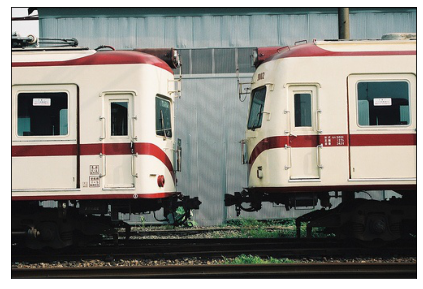

In [18]:
img = train_dataset[0]['img'][0][0]
print(img.shape)
show(torch.from_numpy(img))